<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> **Finanzas Cuantitativas | Verano 2021**. 

**Nombres:** 
- Juan Pablo Ruíz.
- Rubén Hernández.
- Bryan Juárez.

**Fecha:** 01 de junio del 2021.
    
<img style="float: right; margin: 30px 15px 15px 15px;" src="https://www.monash.edu/__data/assets/image/0004/1017517/iStock-611890326-OK3.jpg" width="300" height="500" />

**Expedientes** : 
- 721093.
- 717710.
- 722176.

**Profesor:** José Mario Zárate.  

## Tarea 3.

### Ejercicio 3.1

Revisit the example from previous class:

Buy a start up stock that doesn’t pay dividends estimate the Expected Results using Corporate Finance Theory the X factor stochastic.

Assume a normal distribution.
- Analytical method.
- Simulate in excel/python to test accuracy.

In [2]:
### Importamos librerias a utilizar.
import pandas as pd
import numpy as np
import numpy_financial as npf
from scipy import stats
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
### Algunas funciones para pandas.
pd.core.common.is_list_like = pd.api.types.is_list_like

In [ ]:
### Analytical Solution.
.
.
.

### `Datos de nuestro activo`

Activo: **AMZN**
<br>
precio de cierre al: 01/06/2021
<br>
<li>${S_0}= 3218.65$</li>
<br>

**Datos financieros anuales 2020**

<br>
<li>Shares Outstanding= ${503}$M</li>
<br>

<li>Total Assets= ${321,195}$M</li>
<br>

<li>Total Liabilities= ${227,791}$M</li>
<br>

<li>Common Equity= ${93,404}$M</li>


### `Stock Fair Value`

Para calcular el precio justo de la acción seguimos los siguientes pasos:

1. Multiplicamos los activos por el factor de proyeción.
2. Al resultado del producto anterior le restamos los pasivos.
3. Tomando en cuenta la ecuación contable el resultado de esa sustracción sería el Capital.

$${A-L=E}$$

4. A ese capital lo igualamos al producto del precio de cierre de la acción y la cantidad de acciones en circulación.

$$E=PQ$$

5. Al despejar esa expreción nos queda que el precio justo es igual al Capital entre la cantidad de acciones en circulación.

$$P = \frac{E}{Q}$$


### `Introduciendo el factor de Incertidumbre`
<br>
<li>Asumimos el factor para la proyeción de los activos es una varible aleatoria la cual denotaremos como ${X}$.</li>
<br>
<li>Asumimos que ${X}$ sigue una distribución exponencial.</li>
<br>
<li>${X \sim \mathcal{Exp}(\lambda)}$</li>
<br>
<li>Recordando la PDF de la distribución exponencial: $ f(x) = {{\lambda}e^{-\lambda x}}$ con $\lambda > 0$.</li>
<br>
<li>Asumimos qe el parámetro lambda de la distribución exponencial es de .4, es decir ${\lambda = .4}$</li>
<br>
<li>Recordamos que la Media para una distribucipon esponencial es : $E[X]=\frac{1}{\lambda}$</li>
<br>
<li>Por lo tanto la media es igual a: $E[X]=2.5$</li>
<br>
<li>Recordamos que la Vrianza para una distribucipon esponencial es : $E[X]=\frac{1}{\lambda^2}$</li>
<br>
<li>Por lo tanto la varianza es igual a: $Var[X]=6.25$</li>
<br>


### `Cálculo del Valor Esperado por el método análitico`


<br>
<li>${F}$= Fair Value</li>
<br>
<li>${X}$= Factor de proyección</li>
<br>
<li>${A}$= Activos</li>
<br>
<li>${L}$= Pasivos</li>
<br>
<li>${n}$= acciones en circulación</li>
<br>
    
**Solución:**

Teniendo en cuenta los pasos anteriormente mencionados en el apartado de fair value, planteamos el Fair Value de la siguiente forma:

$$ F = \frac{AX - L}{n} $$

Procedemos a calcular el valor esperado, aplicando el operador Esperanza a la Expresión.

$$ E[F] = E\left[\frac{AX - L}{n}\right] $$

Sacamos la cte $n$.

$$ E[F] = \frac{1}{n}E\left[{AX - L}\right] $$

Reagrupamos la expresión de adentro.

$$ E[F] = \frac{1}{n}\left(E\left[{AX}\right]-E\left[{L}\right]\right)  $$

Una vez más sacamos la constante de la esperanza (Activos).

$$ E[F] = \frac{1}{n}\left(AE\left[{X}\right]-E\left[{L}\right]\right)  $$

Calculamos la Esperanza de una Cte la cual es una Cte (Pasivos).

$$ E[F] = \frac{1}{n}\left(AE\left[{X}\right]-L\right)  $$

Evaluamos nuestras variables en la expresión.

$$ E[F] = \frac{1}{503}\left((321195*2.5)-227791\right)  $$

Finalmente obtenemos: 

$$ E[F] = 1143.5318  $$


### `Cálculo de la Varianza por el método análitico`

$$ Var[F] = Var\left[\frac{AX - L}{n}\right] $$

Sacamos la Cte $n$ al cuadrado.

$$ Var[F] = \frac{1}{n^2}Var\left[{AX - L}\right] $$

Reagrupamos la Expresión y sacamos la Cte al cuadrado (Activos).

$$ Var[F] = \frac{1}{n^2}\left(A^2Var\left[{X}\right]-Var\left[{L}\right]\right)  $$

La Varianza de una Cte es 0 por lo que la varianza de los pasivos da cero.

$$ Var[F] = \frac{1}{n^2}\left(A^2Var\left[{X}\right]\right)  $$

Evaluamos nuestros datos en la expresión.

$$ Var[F] = \frac{1}{503^2}\left(321195^2*6.25\right)  $$

Finalmente obtenemos:

$$ Var[F] = 2548482$$

### `Simulando el factor X ` 
### $X \sim \mathcal{Exp}(\lambda)$ 
**Parámetros:**
$$
mean (\beta): \frac{1}{\lambda}
$$

$$
variance: \frac{1}{\lambda^2}
$$

$$
\lambda = \frac{1}{\beta}
$$

In [3]:
# Variables
A = 321_195 # Activos
L = 227_791 # Pasivos
E = 93_404 # Capital
Q = 503 # Número de Acciones en Circulación
So = 3_218.65 # Precio de cierre al 01/06/2021

In [4]:
# Validando la Ecuación Contable
A == L+E

True

In [5]:
def exp_gen(beta, n):
    X = np.random.exponential(scale = beta, size = n)
    return X

In [6]:
variables = np.concatenate([exp_gen(2.5, 1) for i in range(100000)])

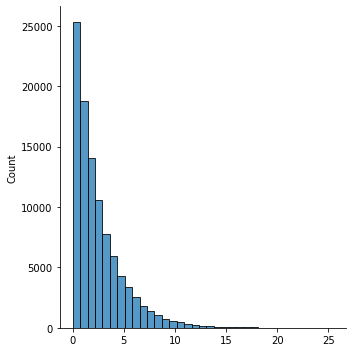

In [7]:
sns.displot(variables, bins = 35);

In [8]:
# Simular E[F] 100,000 Veces
EF = [1/Q*((A*variables[i]) - L) for i in range(len(variables))]

In [9]:
# Promedio de 100,000 EF generados con simulación
EF = np.mean(EF)
EF

1143.6258275817972

In [10]:
%%time
# Generar 1000 V.A exp 1000 veces. Total = 1,000,000 variables
X = [np.concatenate([exp_gen(2.5, 1) for i in range(1000)]) for i in range(1000)]

Wall time: 3.39 s


In [11]:
# Obtener E[X] para cada grupo de 1,000 V.A exp
EX = [np.mean(X[i]) for i in range(len(X))] # tamaño = 1,000

In [12]:
# Generar 1,000 lambdas 
lambdas = [1/np.mean(EX[i]) for i in range(len(EX))]
len(lambdas)

1000

In [13]:
# Obtener 1,000 Varianzas de X con cada lambda
varX = [1/lambdas[i]**2 for i in range(len(lambdas))]

In [14]:
# Obtener 1,000 Var[F]
varF = [(1/Q**2)*(A**2*varX[i]) for i in range(len(varX))]

In [15]:
# Promedio de las 1,000 Var[F] obtenido con simulación
varF = np.mean(varF)
varF

2557634.4182803705

### `Comparación Método Analítico vs Simulación`

In [23]:
df_resultados = pd.DataFrame(index = ['E[F]', 'Var[F]'],
                             data = {'Analítico': [1143.53, 2548482],
                                     'Simulación': np.round([EF, varF], 2)})

In [24]:
df_resultados

,Analítico,Simulación
E[F],1143.53,1143.63
Var[F],2548482.00,2557634.42


### Ejercicio 3.2

Using the properties of random variables and knowing the PDF of the sales product of each year answer analytically:

- What are the expected product sales for year 1 and year 2?
- What the expected revenue in PV for the life of the product? What is the VAR?
- What the expected NPV and VAR for NPV?
- Estimate the PDF of NPV and IRR answer analytically:
    1. What's the probability that the IRR is over the Risk free rate?
    2. What's the probability that the IRR is over the $35\%$?
    3. What's the probability that the project value is over $\$2\text{M}$?
    4. What’s the probability that the IRR is between $10\%$ and $20\%$?
    5. Do you get same responses as in Homework 1.1?

**Import Data.**

In [2]:
### Comenzamos importando nuestro conjunto de datos a trabajar.
data_oil = pd.read_csv('Data_OilCompany.csv')
data_oil.head(10)

,Year 1,Year 2,Year 3,Year 4,Year 5
0,"203,726.00","279,969.00","465,303.00","200,445.00","96,319.00"
1,"263,845.00","272,439.00","2,192.00","199,901.00",-
2,"27,726.00","334,861.00","82,265.00","199,954.00","64,958.00"
3,"293,801.00","210,117.00","275,087.00","199,934.00",-
4,"297,319.00","242,569.00","464,097.00","200,598.00","141,285.00"
5,"36,012.00","296,235.00","484,943.00","199,842.00",-
6,"78,138.00","308,996.00","491,647.00","199,218.00","127,187.00"
7,"61,767.00","269,747.00","23,989.00","199,771.00",-
8,"346,503.00","172,903.00","41,218.00","200,827.00","80,270.00"
9,"149,681.00","205,417.00","441,224.00","199,658.00",-


**Functions definition.**

In [3]:
### Definimos una función para reemplazar caracteres.
def replace_text(x, to_replace, replacement):
    try:
        x = x.replace(to_replace, replacement)
    except:
        pass
    return x

In [4]:
### Definimos una función que nos permita evaluar un proyecto con las metricas de NPV e IRR.
def get_project_valuation(data: 'DataFrame donde se almacenan los posibles valores de producción.',
                          invest: 'Inversión inicial.',
                          price: 'Precio de venta por unidad.',
                          cost: 'Costo fijo por unidad.',
                          fixed: 'Costo de mantenimiento anual.',
                          rf: 'Tasa libre de riesgo.'):
    
    '''La intención de está función es evaluar un proyecto a partir de las métricas del NPV y IRR.'''
    
    ### Definimos un data frame donde almacenaremos los flujos.
    # Flujos de inversión inicial.
    investment_flow = pd.DataFrame([-abs(invest)] * len(data))
    
    # Flujos correspondientes a las cantidades producidas.
    flows = pd.DataFrame([[data.T.iloc[i,j] * (price-cost) - fixed 
                           for i in range(len(data.columns))]
                           for j in range(len(data))])
    
    # Concatenamos los flujos.
    final_flows = pd.merge(investment_flow, flows, right_index=True, left_index=True)
    
    ### Calculamos el valor presente neto, NPV.
    npv_vector = [(npf.npv(rf, final_flows.iloc[i,:])) for i in range(len(final_flows))]
    
    ### Calculamos la tasa interna de retorno, IRR.
    irr_vector = [round(npf.irr(final_flows.iloc[i,:]), 2) for i in range(len(final_flows))]
    
    ### Estructuramos información final en un data frame.
    results = pd.DataFrame(columns=['NPV', 'IRR'])
    results.index.name = 'Scenarios'
    results['NPV'] = npv_vector
    results['IRR'] = irr_vector
    
    ### Retornamos el data frame creado.
    return results

In [5]:
### Definimos una serie de funciones para obtener el ajuste a una distribución teórica sobre un conjunto de datos dado.
### Create models from data.
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

   # Distributions to check
   # DISTRIBUTIONS = [        
      #  st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
       # st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
      #  st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
      #  st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
      #  st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
      #  st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
      #  st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
      #  st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
      #  st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    #]

  # Distributions to check
    DISTRIBUTIONS = [        
        st.gennorm,st.genexpon,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.powerlognorm, st.uniform
    ]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

### Make pdf adjustment.
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [6]:
### Plotting distributions.
def plot_fit(data: 'Conjunto de datos sobre el cual se va a graficar.',
             bins: 'Número de categorias deseadas en el histograma.'):
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fit_params = best_fit_distribution(data, bins, ax)
    best_dist = getattr(st, best_fit_name)

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(u'Data\n All Fitted Distributions')
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')
    
    plt.show()

    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title(u'Data with best fit distribution \n' + dist_str)
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')
    
    plt.show()

**Data Cleansing.**

In [8]:
# Primero iteramos para eliminar los espacios en las celdas de los valores y remplazamos el signo '-' por un 0.
data_oil_values = pd.DataFrame([[(replace_text(data_oil.iloc[i,j], ',', '').strip()) 
                                  for i in range(len(data_oil))] 
                                  for j in range(len(data_oil.columns))][0:5]).replace('-', '0').T

# Iteramos para volver numéricos los valores.
data_oil_values = pd.DataFrame([[int(float(data_oil_values.iloc[i,j]))
                                 for i in range(len(data_oil_values))]
                                 for j in range(len(data_oil_values.columns))])

# Visualizamos.
data_oil_values.T.head(10)

,0,1,2,3,4
0,203726,279969,465303,200445,96319
1,263845,272439,2192,199901,0
2,27726,334861,82265,199954,64958
3,293801,210117,275087,199934,0
4,297319,242569,464097,200598,141285
5,36012,296235,484943,199842,0
6,78138,308996,491647,199218,127187
7,61767,269747,23989,199771,0
8,346503,172903,41218,200827,80270
9,149681,205417,441224,199658,0


In [9]:
# Por cuestión de estética reestructuramos la información en un nuevo data frame.
data_oil_final = pd.DataFrame(np.asmatrix(data_oil_values.T),
                              columns = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])

# Visualizamos.
data_oil_final.index.name = 'Scenarios'
data_oil_final.head(10)

,Year 1,Year 2,Year 3,Year 4,Year 5
Scenarios,,,,,
0,203726,279969,465303,200445,96319
1,263845,272439,2192,199901,0
2,27726,334861,82265,199954,64958
3,293801,210117,275087,199934,0
4,297319,242569,464097,200598,141285
5,36012,296235,484943,199842,0
6,78138,308996,491647,199218,127187
7,61767,269747,23989,199771,0
8,346503,172903,41218,200827,80270


**Questions.**

**_Answer analytically_.**

1°- What are the expected product sales for year 1 and year 2?

Para poder contestar análiticamente 